# Applied Linear Algebra Exercise 3

Amirkabir University of Technology

Dr. Amirmazlaghani

by Gholamreza Dar 

Spring 2022

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import cv2

sns.set_style("dark")

In [19]:
def disp(img, title=None, s=15):
    plt.figure(figsize=(s,s))
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

# Question 1

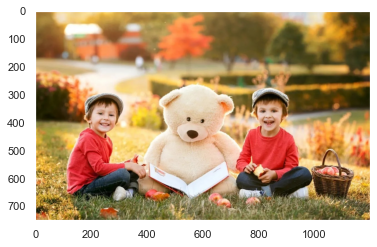

In [20]:
img = cv2.imread("LA_HW3_Programming/part1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


In [21]:
# Seperate Channels
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

In [22]:
# Count every value in the channels
value_r, count_r= np.unique(R, return_counts=True)
value_g, count_g= np.unique(G, return_counts=True)
value_b, count_b= np.unique(B, return_counts=True)

<BarContainer object of 256 artists>

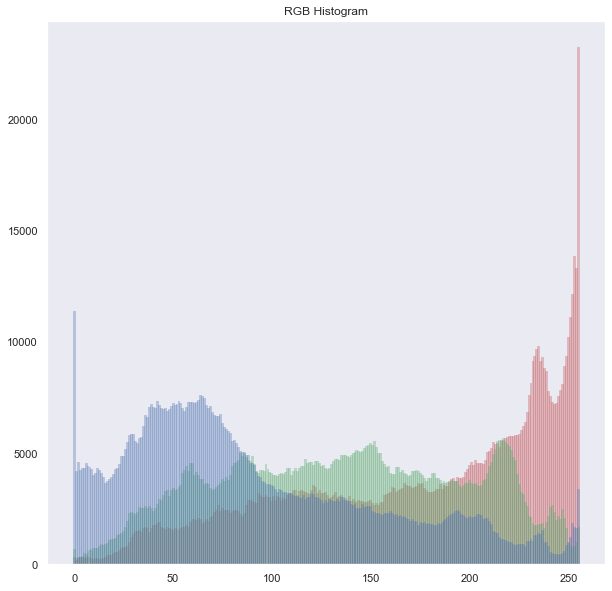

In [23]:
plt.figure(figsize=(10,10))
plt.title("RGB Histogram")
plt.bar(value_r, count_r, color='r', width=1.5, alpha=0.333, linewidth=0.1)
plt.bar(value_g, count_g, color='g', width=1.5, alpha=0.333, linewidth=0.1)
plt.bar(value_b, count_b, color='b', width=1.5, alpha=0.333, linewidth=0.1)

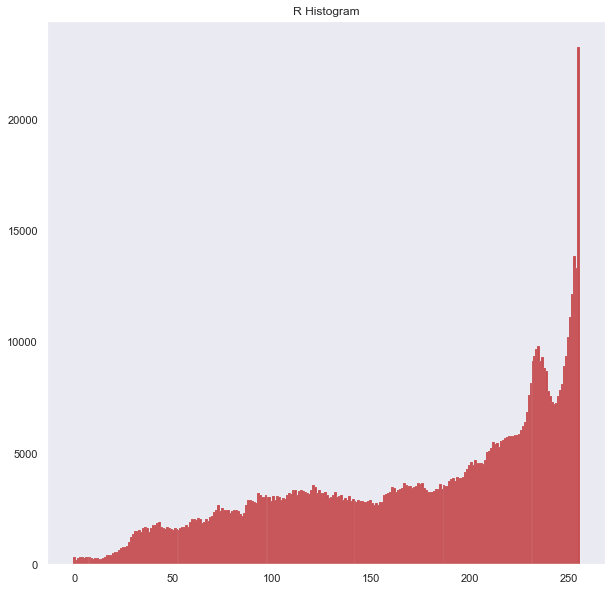

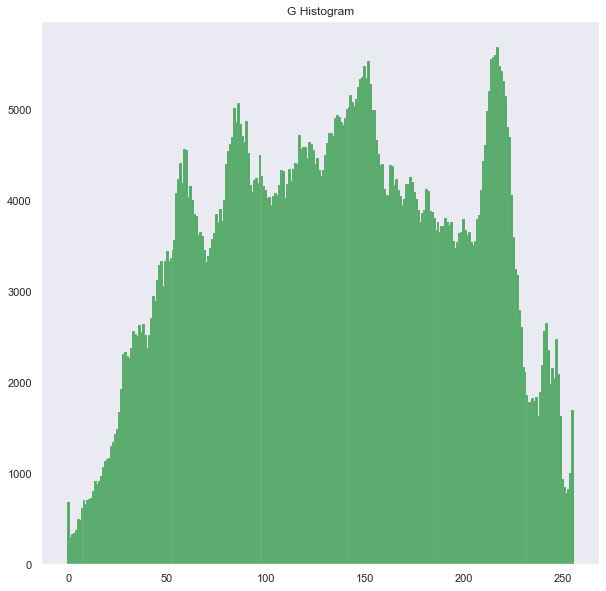

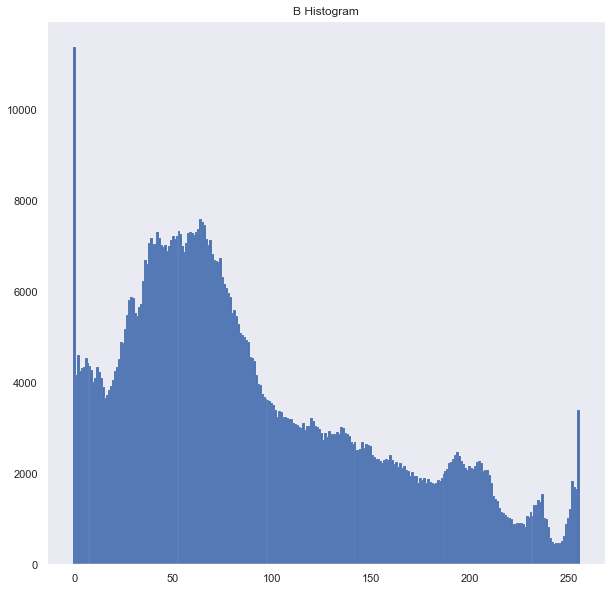

In [24]:
plt.figure(figsize=(10,10))
plt.title("R Histogram")
plt.bar(value_r, count_r, color='r', width=1.5, linewidth=0.1)
plt.show()

plt.figure(figsize=(10,10))
plt.title("G Histogram")
plt.bar(value_g, count_g, color='g', width=1.5, linewidth=0.1)
plt.show()

plt.figure(figsize=(10,10))
plt.title("B Histogram")
plt.bar(value_b, count_b, color='b', width=1.5, linewidth=0.1)
plt.show()


# Question 2

### Load the image

In [25]:
img_parrot = cv2.imread("LA_HW3_Programming/part2_2.png")
img_parrot = cv2.cvtColor(img_parrot, cv2.COLOR_BGR2RGB)

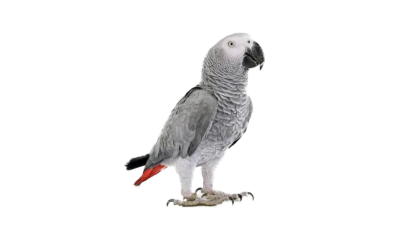

In [26]:
disp(img_parrot, s=7)

### Create the shadow

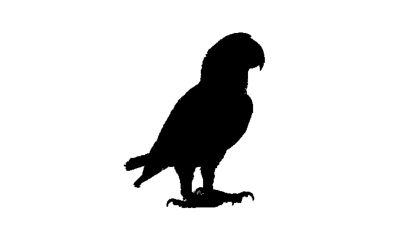

In [27]:
parrot_shadow = np.ones_like(img_parrot)*255
parrot_shadow[np.bitwise_and(
    img_parrot[:,:,0]<250,
    img_parrot[:,:,1]<250, 
    img_parrot[:,:,2]<250
    )] = [0,0,0]
disp(parrot_shadow, s=7)

### Skew the shadow

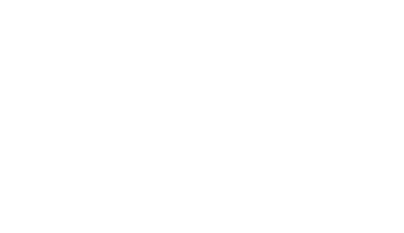

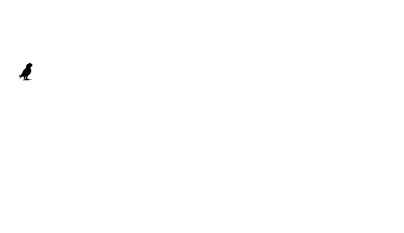

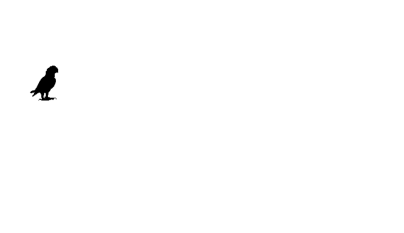

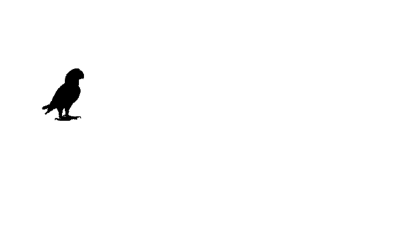

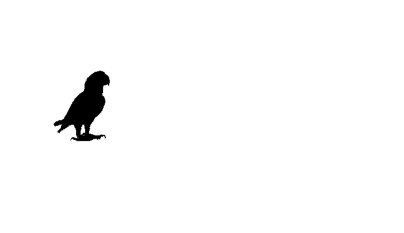

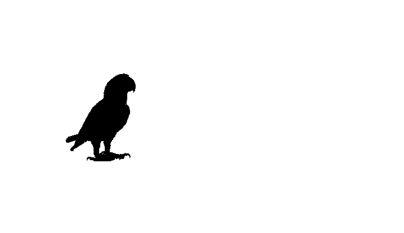

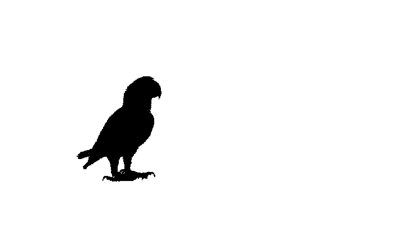

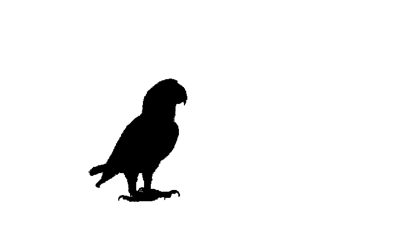

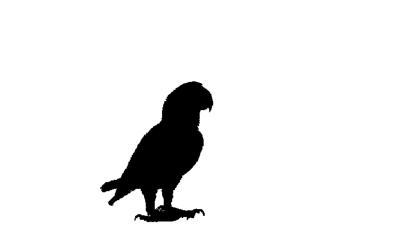

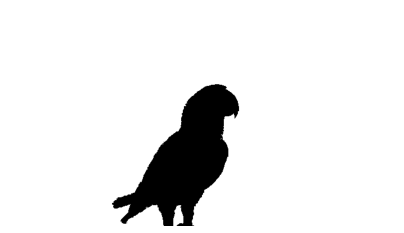

In [28]:
skewed_shadow = np.ones_like(parrot_shadow)*255

for k in range(10):
    T = np.array([
        [k*1/10,0],
        [0,k*1/10]
        ])

    for i in range(parrot_shadow.shape[0]):
        for j in range(parrot_shadow.shape[1]):
            i_p = int(T[0,0]*i + T[0,1]*j) + parrot_shadow.shape[0]//4
            j_p = int(T[1,0]*i + T[1,1]*j) #+ parrot_shadow.shape[1]//4
            if 0<= i_p < parrot_shadow.shape[0] and 0<= j_p < parrot_shadow.shape[1]:
                skewed_shadow[i_p, j_p] = parrot_shadow[i,j]

    disp(skewed_shadow, s=7)

#### Move the origin to the center of the image

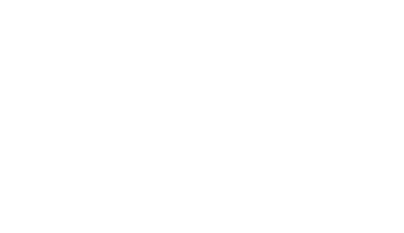

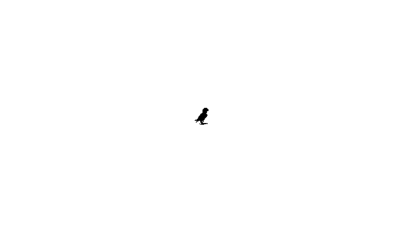

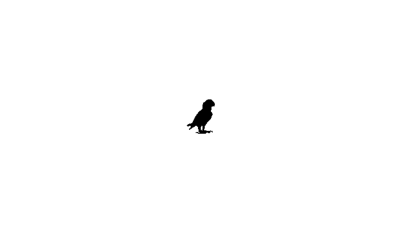

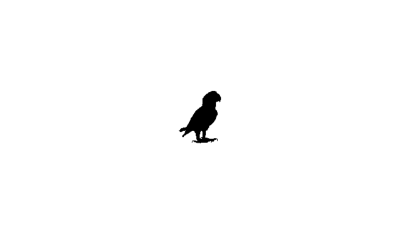

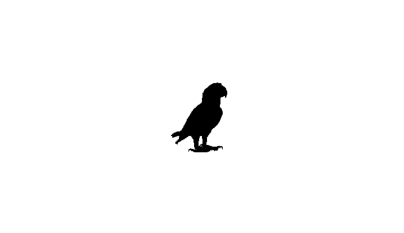

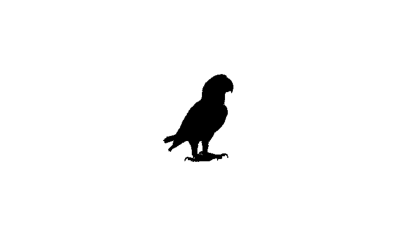

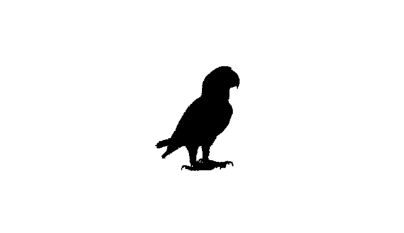

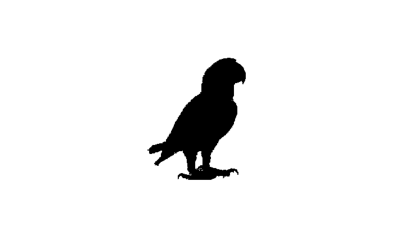

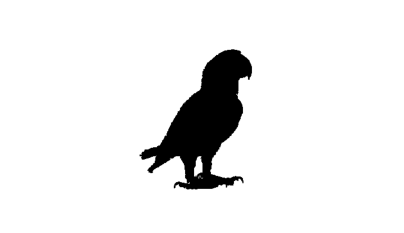

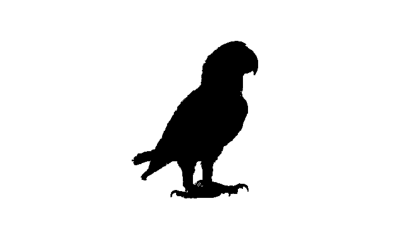

In [29]:
skewed_shadow = np.ones_like(parrot_shadow)*255

for k in range(10):
    T = np.array([
        [k*1/10,0],
        [0,k*1/10]
        ])

    for i in range(-1*parrot_shadow.shape[0]//2, parrot_shadow.shape[0]//2):
        for j in range(-1*parrot_shadow.shape[1]//2, parrot_shadow.shape[1]//2):
            
            i_p = int(T[0,0]*i + T[0,1]*j) + parrot_shadow.shape[0]//2
            j_p = int(T[1,0]*i + T[1,1]*j) + parrot_shadow.shape[1]//2

            i_new = i+parrot_shadow.shape[0]//2
            j_new = j+parrot_shadow.shape[1]//2

            if 0<= i_new < parrot_shadow.shape[0] and 0<= j_new < parrot_shadow.shape[1]:
                if 0<= i_p < parrot_shadow.shape[0] and 0<= j_p < parrot_shadow.shape[1]:
                    skewed_shadow[i_p, j_p] = parrot_shadow[i_new,j_new]

    disp(skewed_shadow, s=7)

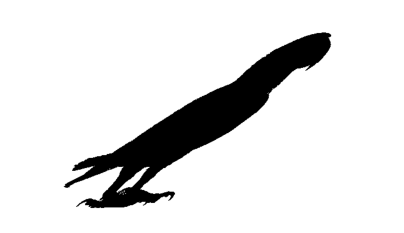

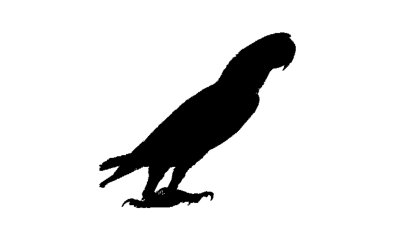

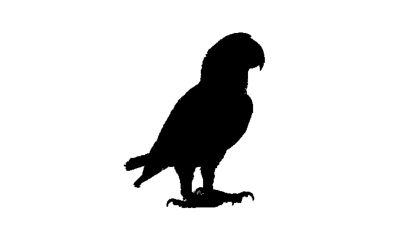

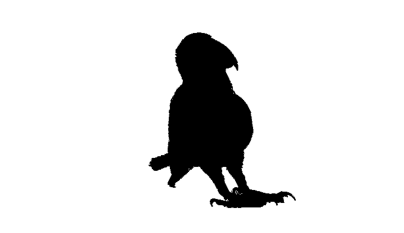

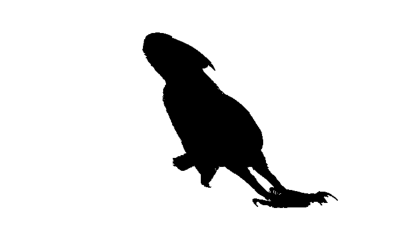

In [30]:
skewed_shadow = np.ones_like(parrot_shadow)*255

for k in [-1, -0.5, 0, 0.5, 1]:
    T = np.array([
        [1,0],
        [k,1]
        ])

    for i in range(-1*parrot_shadow.shape[0]//2, parrot_shadow.shape[0]//2):
        for j in range(-1*parrot_shadow.shape[1]//2, parrot_shadow.shape[1]//2):
            
            i_p = int(T[0,0]*i + T[0,1]*j) + parrot_shadow.shape[0]//2
            j_p = int(T[1,0]*i + T[1,1]*j) + parrot_shadow.shape[1]//2

            i_new = i+parrot_shadow.shape[0]//2
            j_new = j+parrot_shadow.shape[1]//2

            if 0<= i_new < parrot_shadow.shape[0] and 0<= j_new < parrot_shadow.shape[1]:
                if 0<= i_p < parrot_shadow.shape[0] and 0<= j_p < parrot_shadow.shape[1]:
                    skewed_shadow[i_p, j_p] = parrot_shadow[i_new,j_new]

    disp(skewed_shadow, s=7)

#### Find the feet's center

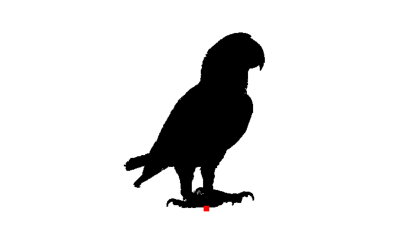

In [31]:
parrot_shadow_copy = parrot_shadow.copy()
w = 10
x,y = 350, 355
parrot_shadow_copy[y:y+w, x:x+w] = [255, 0, 0]
disp(parrot_shadow_copy, s=7)

#### Move the origin to the center of the feet

In [32]:
# skewed_shadow = np.ones((parrot_shadow.shape[0]+100, parrot_shadow.shape[1]+100, 3))*255

# feet_x = 350
# feet_y = 355
# alpha = 6

# skewed_shadow_images = []

# for k in range(0,10):
#     T = np.array([
#         [1,0],
#         [-1*k/alpha,1]
#         ])

#     for i in range(-1*feet_y, parrot_shadow.shape[0]-feet_y):
#         for j in range(-1*feet_x, parrot_shadow.shape[1]-feet_x):
            
#             i_p = int(T[0,0]*i + T[0,1]*j) + feet_y
#             j_p = int(T[1,0]*i + T[1,1]*j) + feet_x

#             i_new = i+feet_y
#             j_new = j+feet_x

#             if 0<= i_new < parrot_shadow.shape[0] and 0<= j_new < parrot_shadow.shape[1]:
#                 if 0<= i_p < parrot_shadow.shape[0] and 0<= j_p < parrot_shadow.shape[1]:
#                     skewed_shadow[i_p, j_p] = parrot_shadow[i_new,j_new]
                    
#     skewed_shadow_images.append(skewed_shadow)
#     disp(skewed_shadow, s=7)

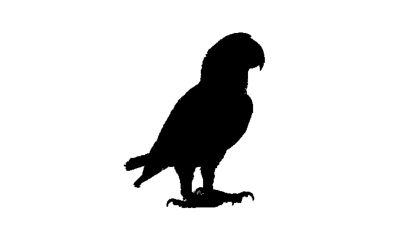

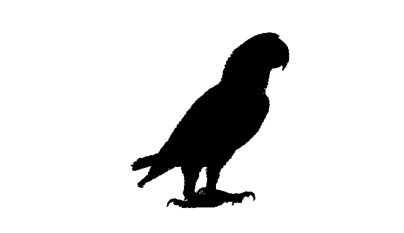

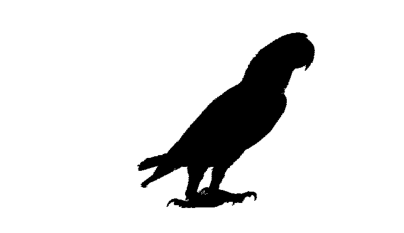

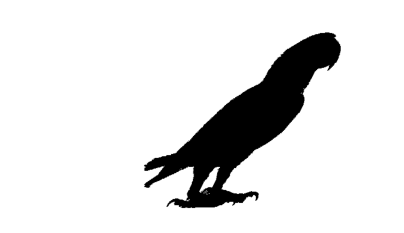

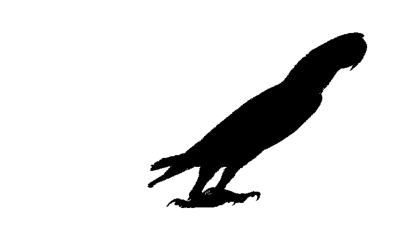

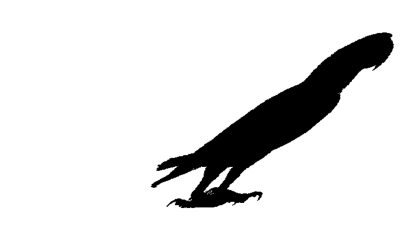

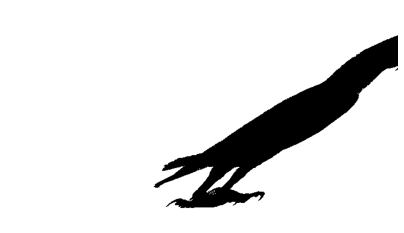

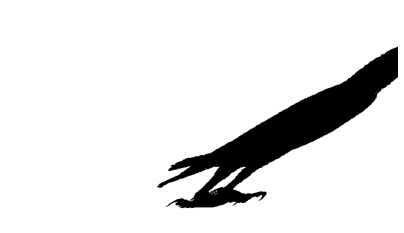

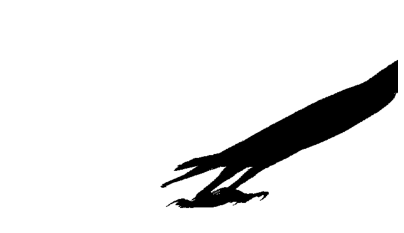

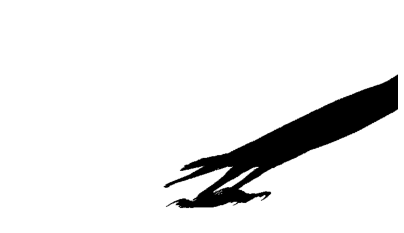

In [35]:
skewed_shadow = np.ones((parrot_shadow.shape[0], parrot_shadow.shape[1], 3), dtype='uint8')*255

feet_x = 350
feet_y = 355
alpha = 6

skewed_shadow_images = []

for k in range(0,10):
    T = np.array([
        [1,0],
        [-1*k/alpha,1]
        ])

    for i in range(-1*feet_y, parrot_shadow.shape[0]-feet_y):
        for j in range(-1*feet_x, parrot_shadow.shape[1]-feet_x):
            
            i_p = int(T[0,0]*i + T[0,1]*j) + feet_y
            j_p = int(T[1,0]*i + T[1,1]*j) + feet_x

            i_new = i+feet_y
            j_new = j+feet_x

            if 0<= i_new < parrot_shadow.shape[0] and 0<= j_new < parrot_shadow.shape[1]:
                if 0<= i_p < parrot_shadow.shape[0] and 0<= j_p < parrot_shadow.shape[1]:
                    skewed_shadow[i_p, j_p] = parrot_shadow[i_new,j_new]
    skewed_shadow_images.append(skewed_shadow)
    disp(skewed_shadow, s=7)

### Merge the original image with shadow

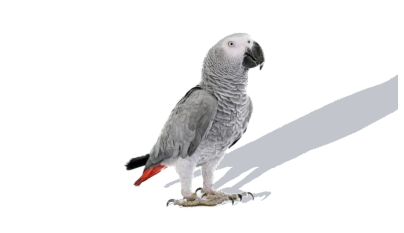

In [36]:
back = skewed_shadow_images[5].copy()

# Make the shadow lighter
back[np.bitwise_and(
    back[:,:,0]<250,
    back[:,:,1]<250, 
    back[:,:,2]<250
    )] = [194,198, 204]

back[np.bitwise_and(
    img_parrot[:,:,0]<250,
    img_parrot[:,:,1]<250, 
    img_parrot[:,:,2]<250
    )] = img_parrot[np.bitwise_and(
    img_parrot[:,:,0]<250,
    img_parrot[:,:,1]<250, 
    img_parrot[:,:,2]<250
    )]

disp(back, s=7)

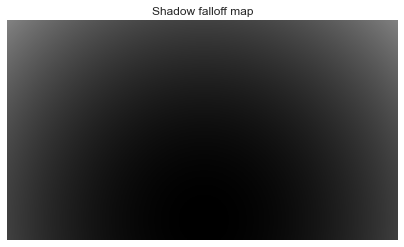

In [119]:
falloff_coeff = 1.9

shadow_falloff = np.zeros_like(skewed_shadow_images[0])
for i in range(shadow_falloff.shape[0]):
    for j in range(shadow_falloff.shape[1]):
        shadow_falloff[i,j] = int(((i-feet_y)**2+(j-feet_x)**2)/(falloff_coeff*1000))
disp(shadow_falloff,"Shadow falloff map", s=7)

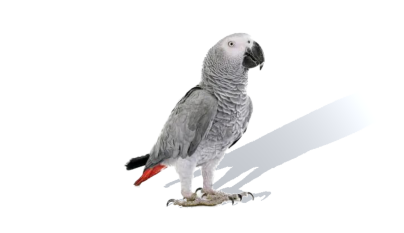

In [120]:
back = skewed_shadow_images[5].copy()

# Falloff shadow
back[np.bitwise_and(
    back[:,:,0]<250,
    back[:,:,1]<250, 
    back[:,:,2]<250
    )] = shadow_falloff[np.bitwise_and(
    back[:,:,0]<250,
    back[:,:,1]<250, 
    back[:,:,2]<250
    )]

shadow_color = np.array([194,198, 204])
colored_shadow = cv2.subtract((np.ones_like(back)*(255-shadow_color)).astype('uint8'), back)

back = 255 - colored_shadow
back[np.bitwise_and(
    img_parrot[:,:,0]<250,
    img_parrot[:,:,1]<250, 
    img_parrot[:,:,2]<250
    )] = img_parrot[np.bitwise_and(
    img_parrot[:,:,0]<250,
    img_parrot[:,:,1]<250, 
    img_parrot[:,:,2]<250
    )]

disp(back, s=7)

## End to End

In [116]:
def make_shadow(img_parrot, shadow_center_x, shadow_center_y, shadow_color, falloff_coeff=1.0):
    # Make the shadow
    parrot_shadow = np.ones_like(img_parrot)*255
    parrot_shadow[np.bitwise_and(
        img_parrot[:,:,0]<250,
        img_parrot[:,:,1]<250, 
        img_parrot[:,:,2]<250
        )] = [0,0,0]

    # Skew the shadow
    skewed_shadow = np.ones((parrot_shadow.shape[0], parrot_shadow.shape[1], 3), dtype='uint8')*255

    feet_x = shadow_center_x
    feet_y = shadow_center_y
    alpha = 4

    skewed_shadow_images = []
    results = []

    for k in range(0,10):
        T = np.array([
            [1,0],
            [-1*k/alpha,1]
            ])

        for i in range(-1*feet_y, parrot_shadow.shape[0]-feet_y):
            for j in range(-1*feet_x, parrot_shadow.shape[1]-feet_x):
                
                i_p = int(T[0,0]*i + T[0,1]*j) + feet_y
                j_p = int(T[1,0]*i + T[1,1]*j) + feet_x

                i_new = i+feet_y
                j_new = j+feet_x

                if 0<= i_new < parrot_shadow.shape[0] and 0<= j_new < parrot_shadow.shape[1]:
                    if 0<= i_p < parrot_shadow.shape[0] and 0<= j_p < parrot_shadow.shape[1]:
                        skewed_shadow[i_p, j_p] = parrot_shadow[i_new,j_new]
                        
        skewed_shadow_images.append(skewed_shadow.copy())
    
    for img_id in range(len(skewed_shadow_images)):
        # Shadow fallofff map
        falloff_coeff = falloff_coeff

        shadow_falloff = np.zeros_like(skewed_shadow_images[img_id])
        for i in range(shadow_falloff.shape[0]):
            for j in range(shadow_falloff.shape[1]):
                shadow_falloff[i,j] = int(((i-feet_y)**2+(j-feet_x)**2)/(falloff_coeff*1000))
        
        back = skewed_shadow_images[img_id].copy()

        # Falloff shadow
        back[np.bitwise_and(
            back[:,:,0]<250,
            back[:,:,1]<250, 
            back[:,:,2]<250
            )] = shadow_falloff[np.bitwise_and(
            back[:,:,0]<250,
            back[:,:,1]<250, 
            back[:,:,2]<250
            )]

        colored_shadow = cv2.subtract((np.ones_like(back)*(255-np.array(shadow_color))).astype('uint8'), back)
        back = 255 - colored_shadow

        back[np.bitwise_and(
            img_parrot[:,:,0]<250,
            img_parrot[:,:,1]<250, 
            img_parrot[:,:,2]<250
            )] = img_parrot[np.bitwise_and(
            img_parrot[:,:,0]<250,
            img_parrot[:,:,1]<250, 
            img_parrot[:,:,2]<250
            )]

        results.append(back.copy())
    
    return results, skewed_shadow_images

### Short Shadow

0


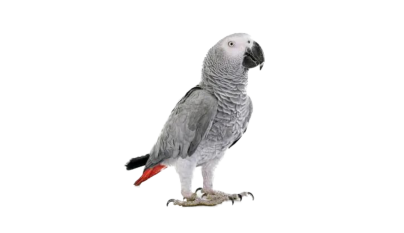

1


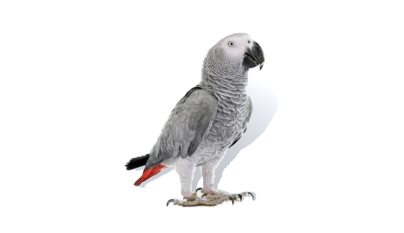

2


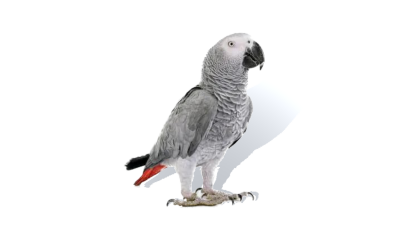

3


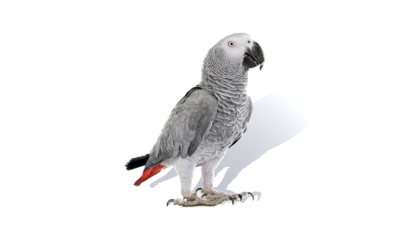

4


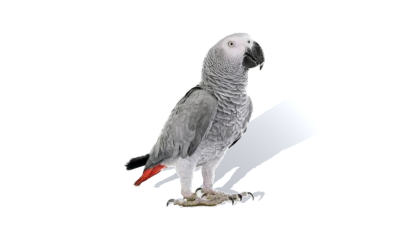

5


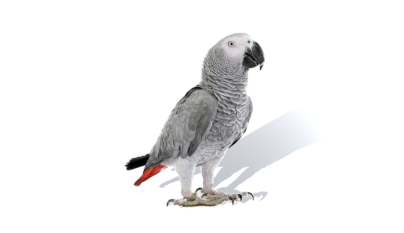

6


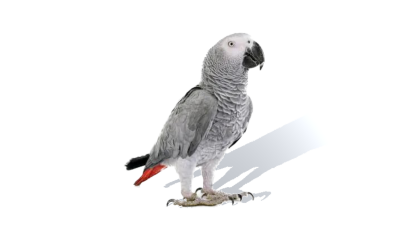

7


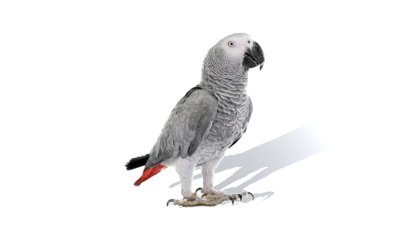

8


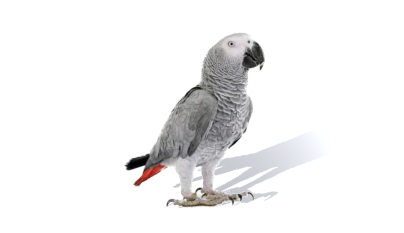

9


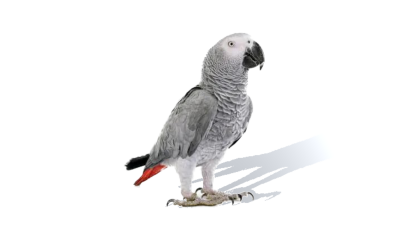

0


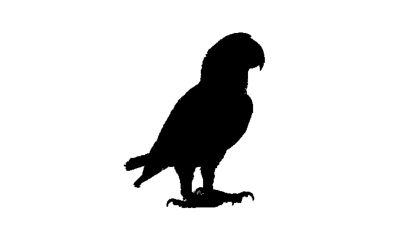

1


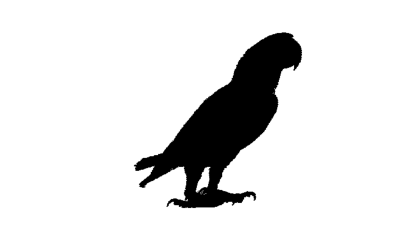

2


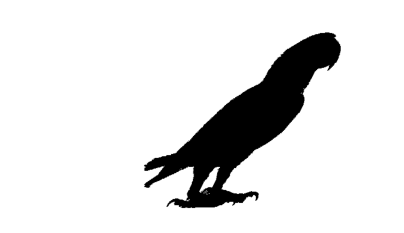

3


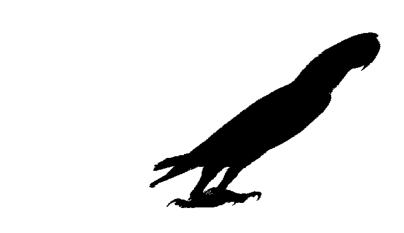

4


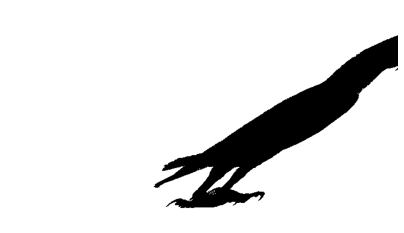

5


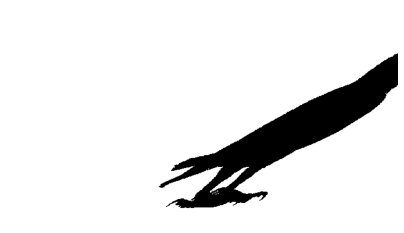

6


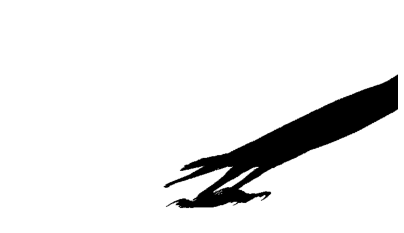

7


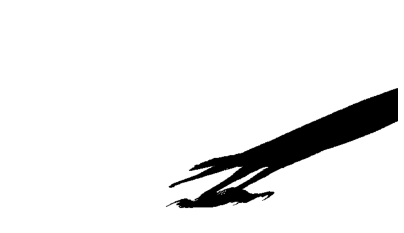

8


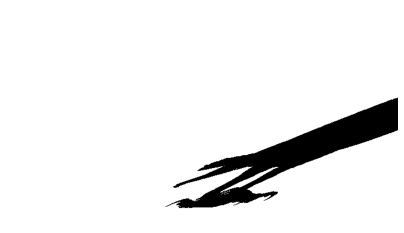

9


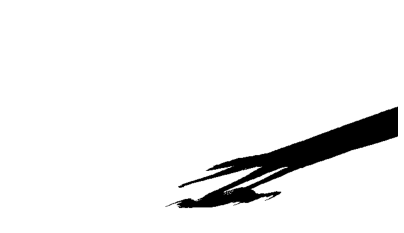

In [136]:
results, shadows = make_shadow(img_parrot, 350, 355, [194,198, 204], falloff_coeff=1.0)

for i in range(len(results)):
    print(i)
    disp(results[i], s=7)
    cv2.imwrite(f"results/small_fall_off_{i}.png", cv2.cvtColor(results[i], cv2.COLOR_RGB2BGR))

for i in range(len(shadows)):
    print(i)
    disp(shadows[i], s=7)


### Longer Shadow

0


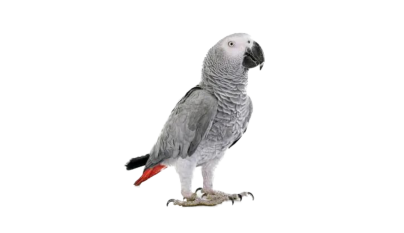

1


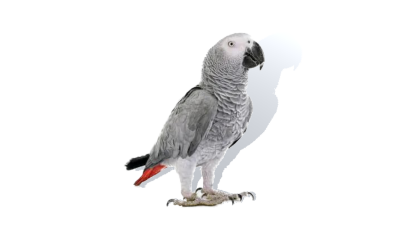

2


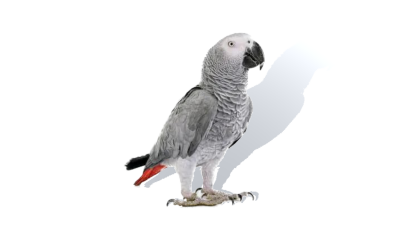

3


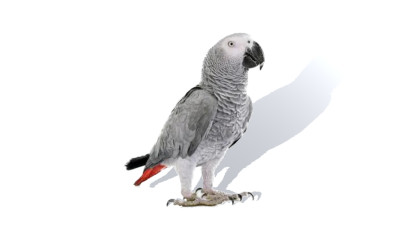

4


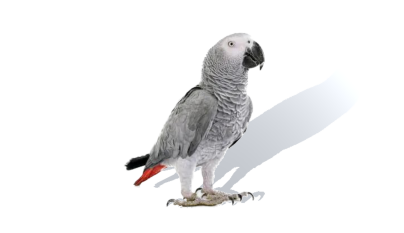

5


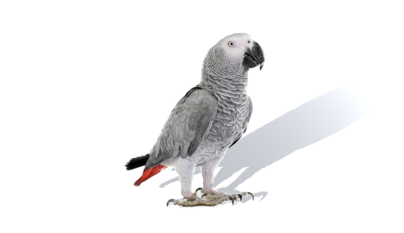

6


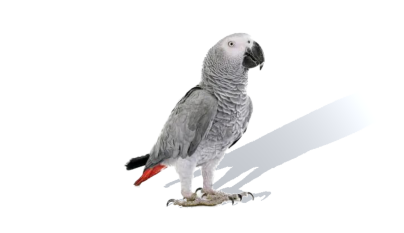

7


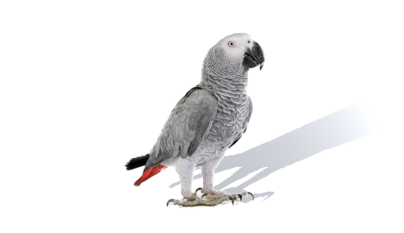

8


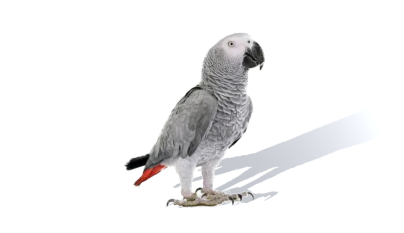

9


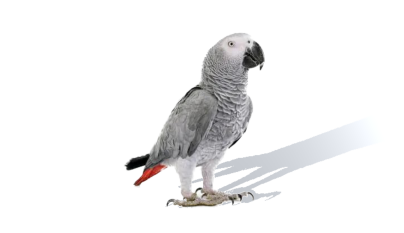

In [132]:
results, shadows = make_shadow(img_parrot, 350, 355, [194,198, 204], falloff_coeff=1.9)

for i in range(len(results)):
    print(i)
    disp(results[i], s=7)
    cv2.imwrite(f"results/big_fall_off_{i}.png", cv2.cvtColor(results[i], cv2.COLOR_RGB2BGR))

### Looong Shadow (No falloff)

0


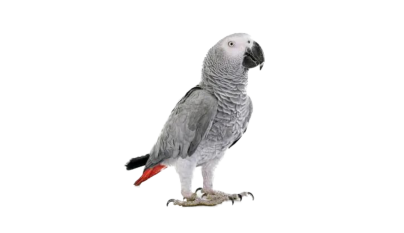

1


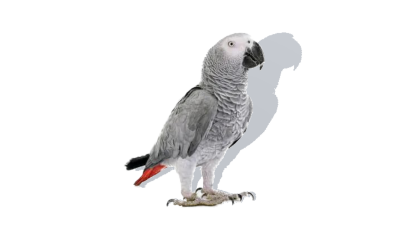

2


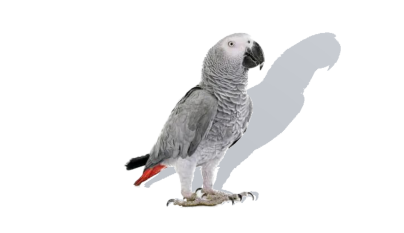

3


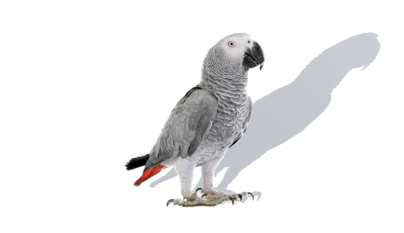

4


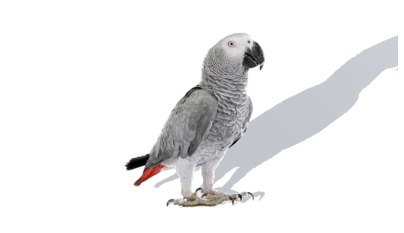

5


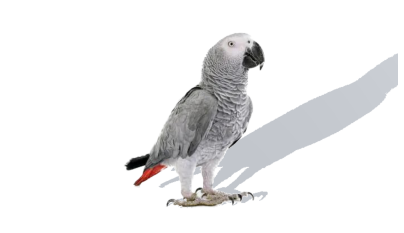

6


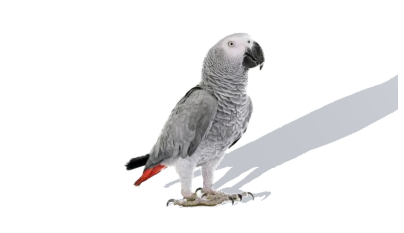

7


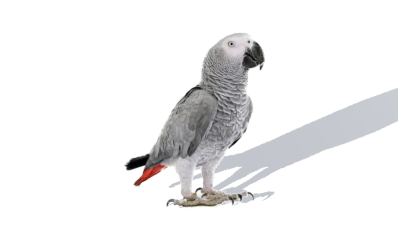

8


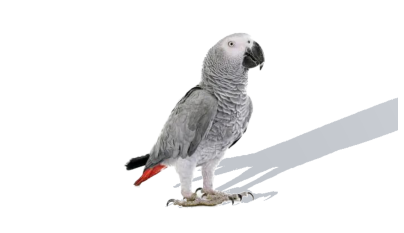

9


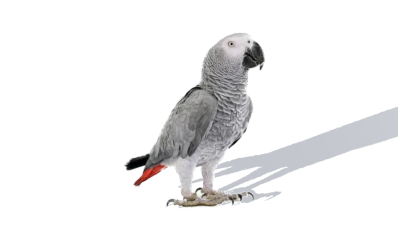

In [133]:
results, shadows = make_shadow(img_parrot, 350, 355, [194,198, 204], falloff_coeff=20)

for i in range(len(results)):
    print(i)
    disp(results[i], s=7)
    cv2.imwrite(f"results/no_fall_off_{i}.png", cv2.cvtColor(results[i], cv2.COLOR_RGB2BGR))

# Question 3

In [1]:
import numpy as np

### Get c & r

In [50]:
c = np.array([0, 1, 2, 3, 4,])
r = np.array([5, 6, 7, 8, 9,])

### Generate Toeplitz matrix

In [95]:
toeplitz = np.zeros((c.shape[0]-1, r.shape[0]-1))
for i in range(toeplitz.shape[0]):
    for j in range(toeplitz.shape[1]):
        if j<=i:
            toeplitz[i,j] = c[i-j]
        else:
            toeplitz[i,j] = r[j-i]
print("Toeplitz matrix:")
print(toeplitz)

Toeplitz matrix:
[[0. 6. 7. 8.]
 [1. 0. 6. 7.]
 [2. 1. 0. 6.]
 [3. 2. 1. 0.]]


### Convert to upper triangular matrix

In [96]:
# Zero number fix
# Convert toeplitz to a upper triangular matrix
toeplitz_upper = toeplitz.copy()

for col in range(toeplitz_upper.shape[1]):
    pivot_row = np.argmax(np.abs(toeplitz_upper[col:, col])) + col

    # Replace a non zero column with col
    temp = toeplitz_upper[col, :].copy()
    toeplitz_upper[col, :] = toeplitz_upper[pivot_row, :].copy()
    toeplitz_upper[pivot_row, :] = temp.copy()

    cell = toeplitz_upper[col, col]
    if cell != 0:
        for row in range(col+1, toeplitz_upper.shape[0]):
            toeplitz_upper[row, :] += toeplitz_upper[col, :] * -1*(toeplitz_upper[row, col]/cell)

print("Upper triangular Toeplitz matrix:")
print(toeplitz_upper)

Upper triangular Toeplitz matrix:
[[3.         2.         1.         0.        ]
 [0.         6.         7.         8.        ]
 [0.         0.         6.44444444 7.88888889]
 [0.         0.         0.         6.78448276]]


### Calculate Determinant

In [97]:
determinant = 1
for i in range(toeplitz_upper.shape[0]):
    determinant *= toeplitz_upper[i, i]
print(f"Determinant: {determinant}")

Determinant: 787.0


## Tests

In [ ]:
# # Only works with non zero numbers
# # Convert toeplitz to a upper triangular matrix
# toeplitz_upper = toeplitz.copy()

# for col in range(toeplitz_upper.shape[1]):
#     cell = toeplitz_upper[col, col]
#     for row in range(col+1, toeplitz_upper.shape[0]):
#         toeplitz_upper[row, :] += toeplitz_upper[col, :] * -1*(toeplitz_upper[row, col]/cell)

# print(toeplitz_upper)

In [93]:
# # Convert toeplitz to a upper triangular matrix
# toeplitz_upper = toeplitz.copy().astype('float')

# for col in range(toeplitz_upper.shape[1]):
#     pivot_row = np.argmax(np.abs(toeplitz_upper[col:, col])) + col
#     if np.max(np.abs(toeplitz_upper[col:, col])) != 0:
#         toeplitz_upper[pivot_row, :], toeplitz_upper[0, :] = toeplitz_upper[0, :], toeplitz_upper[pivot_row, :]
#         cell = toeplitz_upper[pivot_row, col]
#         for row in range(col+1, toeplitz_upper.shape[0]):
#             if pivot_row != row:
#                 # print("hi", -1*(toeplitz_upper[row, col]/cell))
#                 print(toeplitz_upper[row, :], toeplitz_upper[col, :] * -1 * (toeplitz_upper[row, col]/cell))
#                 toeplitz_upper[row, :] += toeplitz_upper[col, :] * -1*(toeplitz_upper[row, col]/cell)
#             else:
#                 print("pivot")
#         print()
#     break

# print(toeplitz_upper)